In [27]:
# Import packages
import numpy as np 
import pandas as pd 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")#, category=FutureWarning)
%matplotlib inline

In [28]:
# Load data
train_data = pd.read_csv('//Volumes/Daniela/DataScience/Kaggle/CustomerChurn/datasets/projeto4_telecom_treino.csv')#, index_col = 0)
test_data = pd.read_csv('//Volumes/Daniela/DataScience/Kaggle/CustomerChurn/datasets/projeto4_telecom_teste.csv')#, index_col = 0)

In [29]:
# Preview data
train_data.head(3)
test_data.head(3)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no


In [30]:
# Renaming the first column to id
train_data.rename(columns = {'Unnamed: 0':'id'}, inplace = True)
test_data.rename(columns = {'Unnamed: 0':'id'}, inplace = True)

In [31]:
# Check the number of registers and features
print("Train shape with Id : {} ".format(train_data.shape))
print("Test shape with Id : {} ".format(test_data.shape))

id_name='id'

# Save the 'Id' column
train_ID = train_data[id_name]
test_ID = test_data[id_name]

# Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train_data.drop(id_name, axis = 1, inplace = True)
test_data.drop(id_name, axis = 1, inplace = True)

# check again the data size after dropping the 'Id' variable
print("\nTrain shape without Id : {} ".format(train_data.shape)) 
print("Test shape without Id : {} ".format(test_data.shape))

Train shape with Id : (3333, 21) 
Test shape with Id : (1667, 21) 

Train shape without Id : (3333, 20) 
Test shape without Id : (1667, 20) 


In [32]:
# Setting the output and variables to 'output' and 'features'
output = 'churn'

y_train = train_data[output]
features = train_data.columns.tolist()
features.remove(output)

In [33]:
# Preview of train dataset
train_data.head(3).append(train_data.tail(3))

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3330,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3331,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no
3332,TN,74,area_code_415,no,yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,no


In [34]:
# Preview of test dataset
test_data.head(3).append(test_data.tail(3))

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
1664,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,no
1665,DC,109,area_code_510,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,no
1666,VT,86,area_code_415,no,yes,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0,no


# EDA

In [35]:
# First I'll convert the output value from string to integer
train_data.replace('no', 0, inplace = True)
train_data.replace('yes', 1, inplace = True)

test_data.replace('no', 0, inplace = True)
test_data.replace('yes', 1, inplace = True)

The output 'churn' presents the same distribution in both datasets.
Also, the amount of customers is not balanced.

Class 0: 2850 (85.51%)
Class 1: 483 (14.49%)


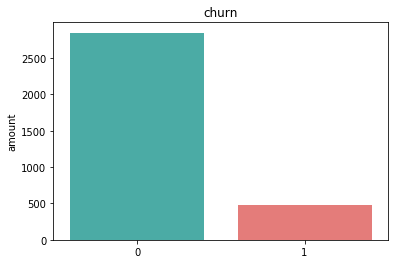

In [36]:
# Function to check the output variable
def check_output(dataset, output):
    amount = dataset[output].value_counts()
    ratio =  dataset[output].value_counts(normalize = True)*100
    print('Class 0: {} ({}%)'.format(amount[0], round(ratio[0],2)))
    print('Class 1: {} ({}%)'.format(amount[1], round(ratio[1],2)))

    labels = ['1' if label == 1 else '0' for label in dataset[output]]
    palette = {'1': '#f56b69', '0': '#3bbbb3'}

    ax = sns.countplot(labels, palette=palette)
    plt.title(output)
    plt.ylabel('amount')
    return plt.show()

check_output(train_data, 'churn')

Class 0: 1443 (86.56%)
Class 1: 224 (13.44%)


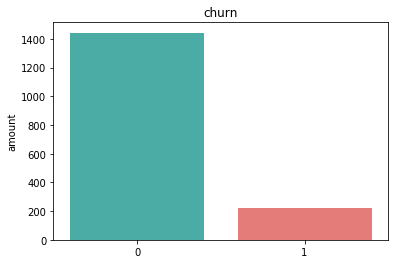

In [37]:
check_output(test_data, 'churn')

In [38]:
# Label encoder to transform categorical features from string to integer
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

le = LabelEncoder()
train_data['state'] = le.fit_transform(train_data['state'])
train_data['area_code'] = le.fit_transform(train_data['area_code'])

In [39]:
y_train = train_data[output]
features = train_data.columns.tolist()
features.remove(output)

X_train = train_data[features]
y_train = train_data[output]

In [44]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))

Before OverSampling, counts of label '0': 2284
Before OverSampling, counts of label '1': 2284


In [41]:
# Split the dataset into train and test, plus balancing the training portion using SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)
print(X_train.shape)

sm = SMOTE(random_state = 42, ratio = 1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)
print(X_train.shape)

(2666, 19)
(4568, 19)


In [42]:
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

After OverSampling, the shape of train_X: (4568, 19)
After OverSampling, the shape of train_y: (4568,) 

After OverSampling, counts of label '1': 2284
After OverSampling, counts of label '0': 2284
